In [866]:
#standard packages
import pandas as pd
import numpy as np

#webscraping packages & SQLite
import pymongo
from pymongo import MongoClient
from bs4 import BeautifulSoup, SoupStrainer
import requests
import urllib.request
import functions as mf

#nlp packages
import string
import nltk
from nltk.corpus import stopwords
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
nlp = spacy.load('en_core_web_lg')

#EDA packages
from collections import Counter, OrderedDict
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors 
from gensim.scripts.glove2word2vec import glove2word2vec

In [761]:
client = MongoClient()
db = client.case_files
cases = db.cases

In [762]:
df = pd.DataFrame(list(cases.find()))

In [763]:
def combine_other_opinions(case_text_entry):
    return [case_text_entry[i]['text'].lower().translate(str.maketrans('', '', string.punctuation)).replace('\n', ' ').replace('•', '') for i in range(1, len(case_text_entry))]

def stop_word_remove(tokenized_text):
    token_list = []
    for token in tokenized_text:
        token_list.append(token.text)
    filtered_sentence =[] 
    for word in token_list:
        lexeme = nlp.vocab[word]
        if lexeme.is_stop == False:
            filtered_sentence.append(word) 
    return filtered_sentence

def remove_names(tokenized_text):
    pass
    

In [764]:
def clean_data(df):
    df['attorneys'] = df['attorneys'].apply(lambda x: None if len(x) == 0  else x[0].split(','))
    df['judges'] = df['judges'].apply(lambda x: None if len(x) == 0 else x[0])
    df['majority_opinion'] = df['case_text'].apply(lambda x: None if len(x) == 0 else (x[0]['text'].lower().translate(str.maketrans('', '', string.punctuation)).replace('\n', ' ').replace('•', '')))
    df['other_opinions'] = df['case_text'].apply(lambda x: None if len(x) == 0 else combine_other_opinions(x))
    df['other_opinions'] = df['other_opinions'].apply(lambda x: None if len(x) == 0 else (x[0].lower()))
    df['tokenized_majority_opinion'] = df['majority_opinion'].apply(lambda x: nlp.tokenizer(x))
    df['tokenized_other_opinions'] = df['other_opinions'].apply(lambda x: nlp.tokenizer(x) if x != None else False)
    df['no_stop_words_majority'] = df['tokenized_majority_opinion'].apply(lambda x: stop_word_remove(x))
    df['no_stop_words_other'] = df['tokenized_other_opinions'].apply(lambda x: stop_word_remove(x) if x != False else False)                                                      
    return df

In [765]:
test = clean_data(df)
test.head(15)

,_id,attorneys,case_id,case_name,case_text,court_id,court_name,decision_date,frontend_url,judges,majority_opinion,other_opinions,tokenized_majority_opinion,tokenized_other_opinions,no_stop_words_majority,no_stop_words_other
0,5d66e470e59ddf33befdfe06,None,37588,In the matter of the Complaint made against Jo...,"[{'text': 'ORDER OF PUBLIC CENSURE Whereas, In...",8874,Kansas Supreme Court,1970,https://cite.case.law/kan/206/335/,None,order of public censure whereas in a proceedin...,None,"(order, of, public, censure, whereas, in, a, p...",False,"[order, public, censure, proceeding, conducted...",False
1,5d66e470e59ddf33befdfe07,None,37656,In the matter of the Complaint made against Ro...,"[{'text': 'ORDER OF PUBLIC CENSURE Whereas, In...",8874,Kansas Supreme Court,1970,https://cite.case.law/kan/206/334/,None,order of public censure whereas in a proceedin...,None,"(order, of, public, censure, whereas, in, a, p...",False,"[order, public, censure, proceeding, conducted...",False
2,5d66e470e59ddf33befdfe08,None,1747634,State of Connecticut v. Anonymous (1971-5),"[{'text': 'Moraghan, J. The defendant has move...",13405,Connecticut Circuit Court,1970,https://cite.case.law/conn-cir-ct/6/443/,None,moraghan j the defendant has moved to suppress...,None,"(moraghan, j, the, defendant, has, moved, to, ...",False,"[moraghan, j, defendant, moved, suppress, cert...",False
3,5d66e470e59ddf33befdfe09,None,1747661,State of Connecticut v. Anonymous (1971-3),"[{'text': 'Dearington, J. Following a trial to...",13405,Connecticut Circuit Court,1970,https://cite.case.law/conn-cir-ct/6/393/,None,dearington j following a trial to the jury the...,None,"(dearington, j, following, a, trial, to, the, ...",False,"[dearington, j, following, trial, jury, defend...",False
4,5d66e470e59ddf33befdfe0a,None,1747680,State of Connecticut v. Anonymous (1971-7),"[{'text': 'Casale, J. The defendant, after a t...",13405,Connecticut Circuit Court,1970,https://cite.case.law/conn-cir-ct/6/462/,None,casale j the defendant after a trial to the co...,None,"(casale, j, the, defendant, after, a, trial, t...",False,"[casale, j, defendant, trial, court, found, gu...",False
5,5d66e470e59ddf33befdfe0b,None,1747684,State of Connecticut v. Anonymous (1971-2) (si...,"[{'text': 'Jacobs, J. Following a jury trial, ...",13405,Connecticut Circuit Court,1970,https://cite.case.law/conn-cir-ct/6/372/,None,jacobs j following a jury trial the defendants...,casale j concurring i concur in the result but...,"(jacobs, j, following, a, jury, trial, the, de...","(casale, j, concurring, i, concur, in, the, re...","[jacobs, j, following, jury, trial, defendants...","[casale, j, concurring, concur, result, ground..."
6,5d66e470e59ddf33befdfe0c,None,1747761,State of Connecticut v. Anonymous (1971-6),[{'text': 'Per Curiam. The defendant was given...,13405,Connecticut Circuit Court,1970,https://cite.case.law/conn-cir-ct/6/451/,None,per curiam the defendant was given a uniform t...,None,"(per, curiam, the, defendant, was, given, a, u...",False,"[curiam, defendant, given, uniform, traffic, s...",False
7,5d66e470e59ddf33befdfe0d,None,1747765,State of Connecticut v. Anonymous (1971-4),"[{'text': 'Bieluch, J. The defendant was one o...",13405,Connecticut Circuit Court,1970,https://cite.case.law/conn-cir-ct/6/402/,None,bieluch j the defendant was one of a group of ...,None,"(bieluch, j, the, defendant, was, one, of, a, ...",False,"[bieluch, j, defendant, group, thirty, demonst...",False
8,5d66e470e59ddf33befdfe0e,None,1768441,State of Connecticut v. Anonymous (1971-9),"[{'text': 'Armentano, J. The defendant is char...",8872,Connecticut Superior Court,1970,https://cite.case.law/conn-supp/29/153/,None,armentano j the defendant is charged with poss...,None,"(armentano, j, the, defendant, is, charged, wi...",False,"[armentano, j, defendant, charged, possession,...",False
9,5d66e470e59ddf33befdfe0f,None,1768489,State of Connecticut v. Anonymous (1971-1),"[{'text': 'Palmer, J. This is an information i...",8872,Connecti

In [776]:
#text in tokenized are spacy tokens, so have to convert them to strings for the models 
majority = [i.text for i in test.tokenized_majority_opinion]

In [870]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(majority_no_stop)]
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

In [871]:
model.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

In [875]:
test_input = '''The policy of the hospital is, as a result of the lease to the Corporation, set by the Corporation's Board of Directors which consists of nine members. Five are drawn from 'life members'-consisting of all people who have contributed $1,000 or more to the Corporation-and four are elected by 'advisory-members'-consisting of any Orange County property owner who attends Corporation meetings.'''
test_input.lower().translate(str.maketrans('', '', string.punctuation)).replace('\n', ' ').replace('•', '')
test_input = nlp.tokenizer(test_input) 

In [877]:
test_input= stop_word_remove(test_input)

In [879]:
vector = model.infer_vector(test_input)

In [904]:
sims = model.docvecs.most_similar([vector])

In [905]:
sims

[(2057291, 0.9978731274604797),
 (2446780, 0.9966447353363037),
 (2092298, 0.9963670372962952),
 (1848026, 0.9962244033813477),
 (2408936, 0.9956466555595398),
 (1569841, 0.9953943490982056),
 (622276, 0.9951876997947693),
 (2513054, 0.994355320930481),
 (790234, 0.9942125678062439),
 (2554247, 0.9941110610961914)]

In [902]:
for i in range(0,10):
    print(majority_no_stop[sims[i][0]])
        

case
1964
251
element
condition
   
433
v
   
assets


In [ ]:
test

In [ ]:
for epoch in range(10):
    if epoch % 2 == 0:
        print(f'now training epoch {epoch}')
        model.train()
        model.alpha -= 0.002
        model.min_alpha = model.alpha

In [777]:
word_model = Word2Vec(majority, size=100, window=5, min_count=1, workers=4)
word_vectors = model.wv

In [778]:
word_vectors.most_similar('murder')

[('manslaughter', 0.8562285900115967),
 ('offense', 0.8336950540542603),
 ('degree', 0.8305367827415466),
 ('rape', 0.8081313371658325),
 ('felony', 0.7974668145179749),
 ('robbery', 0.782382071018219),
 ('crime', 0.7782993316650391),
 ('assault', 0.7671577334403992),
 ('first-degree', 0.7540514469146729),
 ('second-degree', 0.748438835144043)]

In [779]:
word_vectors.most_similar('boy')

[('girl', 0.9033474922180176),
 ('coat', 0.8564658164978027),
 ('chest', 0.849364161491394),
 ('carton', 0.8484300374984741),
 ('leg', 0.833362340927124),
 ('woman', 0.8320904970169067),
 ('cigarettes', 0.8302595615386963),
 ('couple', 0.8276932239532471),
 ('fight', 0.8268307447433472),
 ('felder', 0.8253911733627319)]

In [39]:
#must input file online that already has 
#model = KeyedVectors.load_word2vec_format(legal_vectors)
#model.train(list of tokens from my data NOT LEMMATIZED)

In [ ]:
#what are most similar words?
model.most_similar('word')
#least similar words
model.most_similar(negative='word')

In [781]:
#analogy('japan', japaneese', 'austria') #should return austrian
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [782]:
analogy('man', 'rape', 'woman')

/Users/minnafingerhood/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


'burglary'

In [784]:
model.doesnt_match('murder rape steal dance'.split())

/Users/minnafingerhood/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  """Entry point for launching an IPython kernel.


'dance'

In [379]:
#words = listof strings
#dont over trust because PCA can lose some of the dimensionality and relationships 
def display_pca_scatter(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [word for word in model.vocab]
            
    word_vectors = np.array([model[w] for w in words])
    
    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='b')
    #look up better way for point labeling 
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

In [787]:
#display_pca_scatter(word_model, words=['murder', 'rape'], sample=0)

In [448]:
person_filter = [i for i in spacy_case_text.ents if i.label_ in ["PERSON"]]
print(person_filter)

[halse, ramona, ralph, ramona, •, diane, ralph, ralph, halse, ralph, john, marian swartz, halse, diane, halse, jackson, jackson, halse, halse, halse, davis, collins, lindsay, halse, halse, halse, jones, nelson, nelson]


In [755]:
#removes names
_text = nlp(test2.majority_opinion[1900])
#person_filter = [i for i in _text.ents if i.label_ in ["PERSON"]]

names = []

for chunk in _text.noun_chunks:
    for i in chunk.ents:
        if i.label_ in ['PERSON']:
            names.append(chunk.text)    


In [754]:
names = []
sample = test2.majority_opinion[1890]
_text = nlp(test2.majority_opinion[1890])

for chunk in _text.noun_chunks:
    for i in chunk.ents:
        if i.label_ in ['PERSON']:
            names.append(chunk.text.split()) 
            
names_flat = [name for sublist in names for name in sublist]
            
for word in sample.split():
       if word in names_flat:
            sample.replace(word, 'xxxxxxx')


# for name in names:
#     test2.majority_opinion[1900].replace(name, 'xxxxxxx')

# test2.majority_opinion[1900]

# print(string)

# test2.majority_opinion[1900].split().replace(names, 'xxxxxxx')


In [40]:
# for i,x in enumerate(db.cases.find({}, {'decision_date':1})):
#     print(i)
#     print(x)

In [792]:
 for word in model.wv.vocab:
        print(word)

majority
:
order
of
public
censure
whereas
,
in
a
proceeding
conducted
by
the
state
board
law
examiners
to
inquire
into
complaints
alleged
professional
misconduct
john
w.
sowers
and
following
full
hearing
as
such
found
that
said
was
guilty
violating
his
common-law
duty
client
canon
nos
.
15
38
44
canons
ethics
(
198
kan.
xvn
)
see
dr
2-110
2
3
;
5-107
7-101
code
responsibility
205
lxxxvi
lxxxvh
has
made
written
recommendation
this
court
be
disciplined
“
”
provided
rule
no
m
lxh
pursuant
subdivision
n
above
writing
elected
accept
recommended
discipline
pay
costs
upon
consideration
record
being
fully
advised
premises
corut
accepts
it
is
therefore
considered
ordered
adjudged
he
hereby
censured
further
published
official
kansas
reports
dated
12th
day
december
1970
robert
louis
marietta
three
violations
9
one
1
violation
6
xvh
7-104
5-105
b
lxxxv
provisions
k.
s.
78-101
205kan
moraghan
j.
defendant
moved
suppress
certain
evidence
seized
under
search
seizure
warrant
for
apartment
attack
an
e

uncertainty
practicable
sensible
andrews
108
209
213
strict
narrowest
technical
words
disregard
frustration
obvious
intent.
faro
118
267
274
corbett
215
233
room
ex
rel
cooley
kegley
143
679
683
zazzaro
128
165.
barber
kinsella
277
72
watch
tower
bible
tract
bristol
57
305
572.
doing
aware
calculated
likely
another
violence
7.
stated
us
sense
comfort
happiness
instituted
secure.
intentionally
naturally
disquietude
vicinity
bishop
9th
ed
539.
break
merely
codification
common
boyer
288
291.
define
specifies
ways
id.
292
citing
b.
'§
punishable
separate
distinct
291
robinson
430
292.
townsend
73
similar
reviewing
problem
vagueness
forceful
arguments
compelling
favor
unconstitutionality
bear
admonition
roth
237
796
797
responsible
administration
inferior
ours
personal
initiate
uncharted
course
overturn
long
regarded
vital
social
importance
wide
support.
earlier
muolo
119
323
326
pass
declare
invalid
nevertheless
take
action
clearest
litigants
imperative
better
matter
brought
otherwise.
sta

enumerated
4,300
5,150
longevity
beginning
ninth
concern
happens
1,1970
completed
680
4,980
4,640
1972
exactly
refers
boards
equating
claffy
lewis
193
449
throws
thrust
1948
cities
crux
dealt
summarized
453
prescribes
enlarge
delinquent
extra
faithful
larger
efforts
sheriff.
comptroller
st
comp.
disparity
ix
xiii
increased
governments
empowered
confer
implement
201
fix
h
subd
par
referendum
village
increases
elective
increase
commencement
office.
p
758
schedules
.annual
fixes
elects
finegan
cohen
275
y
432
charter
appoint
canvass
councilmen
dominant
purse
scope
§7
none
unworthy
motive
desire
binding
represented
champion
tenney
annulment
restriction
divorced
25
1959
prayer
actually
.seeking
nullity
presbrey
477
483
``
whenever
nineteen
sixty-seven
again.
boardman
ch
25.01
remarried
voidable
polizzi
309-310
farber
trucking
bergan
determines
edward
goodell
payee
check
altered
drawer
wallach
retail
jewelry
carol
purported
store
customer
tray
rings
ring
2,900
inquired
accepted
banker
deposi

lién
■
•
_=
compromise
adequately
cross-appeal
i.c
45-301
limits
harvesting
'erred
obj
ection
idaho
liberality
pennsylvania-coeur
alene
mining
gallagher
1910
gaskill
1924
i.r.c.p
objected
freely
subserved
objecting
purportedly
reflect
prepare
moore
action.
occurrence
opposing
prejudiced
¶
15.13
984-985
reynolds
hodge
borden
pleading
pleading.
competency
relevancy
.here
there-
muncey
stipulations
expedient
advancement
accomplishment
employed.
c.j.s
'*
■*
*■
897.
151-152
588
evans
690
614
1931
storey
183
990
1919
--
settle
harward
did-not
ratified
.b.anlc
unexecuted
es-topped
■well
founded
ratification
ralph
fruse
crop.
acquiesced
purposes.
execute
feeding
newcomb
releasing
proof.
whipple
bethlahmy
bechtel
lessee
calves.
exhaust
resorting
junior
lienor
vine-wood
realty
263
lentini
sav
ass
6322
20th
ave.
sup.
n.y.sup.ct
victor
gruen
associates
826
rundquist
1017
diminish
mcquade
donaldson
shepard
spear
landowners
chancery
enjoined
charlotte
ordinance.
reopen
ordinance
null
enabling
vermon

affray
spilled
bent
combat
intoxicating
liquors
indispensable
ingredient
558
bancroft
quigley
kane
grille
graff
justice.
meager
glean
eugene
katherine
vacant
1950.
deeded
metzen
oakview
8,900
mortgagors
henrys
occupied
finished
24,1953
conveyed
warranty
1953.
albright
metzens
12,500
installments
unpaid
balances
commence
unanswered
expended
6,000
usurious
1958.
arrearage
14,1966
5,700
30,1963
drovers
11,000
occupying
4,149.07
cancellation
30-day
deeds
de-
tamer
interposed
24,1953.
19,1953
constant
28th
rudolph
121.
detaining
restitution
1,1967
amplifies
explains
deliver
reform
detainer
vendees
488.01
488.20.
confers
488.04
488.05.
forcible
488.05
demanded
transmit
event.
488.20
532.41
earliest
obviate
unimportant
mortgage.
shakopee
kopp
511,159
903
henschke
christian
648
staughton
126.
engel
256
syllabus
summarizes
clothed
redeem
extinguished
borrows
canceled
forfeited
borrower
redemption
1923
9576
mason
foreclosure.
predecessor
559.21
dunnell
dig
6154
reformed
stipe
jefferson
grantee
g

mathematical
withixi
circumstaxices
axid
thexn
murdock
wovember
aggregate
wfe
unemployed
370.65
4,342.00
361.83
611.83
120.65
711.83
20.65
mecklenburg
week-end
surroundings
uncollected
anticpated
retried
reevaluated
littlejohn
rosen
bussey
davies
colleton
larceny
housebreaking
coerced
understandingly
interrogated
extradition
arranging
indigent
wth
safekeeping
opporunity
recess
explanations
holliday
belated
illiterate
toal
coercive
vitally
unexplained
brailsford
jj-
northwestern
adjuster
duress
greenebaum
burnley
ill.app.2d
meirer
pocius
repudiate
vlceks
repudiation
skelly
bled
wound
thigh
inflicting
2403
prison
turns
recount
comers
first-floor
stiff
skirt
half-slip
underpants
five-year-old
step-granddaughter
matted
pool
mattress
bedspread
pan
bathroom
pinkish
liquid
drops
vomitous
paring
dark
trash
porch
pictures
entrances
streaks
torso
laceration
of-a
spots
holes—
—in
anywhere
interviewed
bloody
pink
liver
testi
fied
jail.
eighths
femoral
artery
coroner
bleed
soon
stem
alcohol
drunk
e

fii
conceptual
allows
státe
sector
habit
distributing
reallocating
norms
legislatures
strides
reflecting
broadening
equality.
state-supported
caseload
201-219
labor-management
141-187
'cflr
annul
isehool
beldock
meritorious
boyle
krebs
schulz
1010
1011
disbarred
confirm
disbarment
reinstate
fitness
counselor
recommendations
'contract
workmanship
suitability
agreement.
supervise
sheeting
bracing
18,754.80
culminating
'cplr
7502
7503
wachtell
365-366
thornton
7b
2103
2214
weinstein-kornmiller
prac.
7502.03
141:48
nagy
iron
hosiery
mfrs
gorp
goldston
amerieam
haupt
bose
108,110-111
sport
fashions
spirit
effectuation
arbitrators
arbitral
lipsehutz
gutwirth
61-62
kúshlin
bialer
disqualify
arbitrator
astoria
med
cflr
31,1969
hungry
aüy
constr
epicondylitis
23.08
panel
of-
75.10
tne
neyer
-see
redder
clyde
contr
929
-be
contraction
recurrence
-september
ferrara
injections
lamp
o.k.
o.k
reiehel
-inconsistent
robber
steven
.steven
brownsville
ambush
reputation
mugger
couched
spontaneous
viable


due.
amsco
stanislaw
huntington
parkway
r-10
postponement
costing
6,111.77
annually
million
irreparably
harmed
indemnify
geiler
returnable
goldstein
28,1969
ambro
mugridge
ceeded
cross-moves
3211
6313
duties.
contrived
publish
ritchie
manno
classifying
.be
introductory
irresistibly
transmitted
geffen
cory.
5704
6314
neglected
geller
flamount
mut
revisory
beach
jewish
brooklyn
oppose
suyra
outweighs
restrained
paliotto
islip
hempstead
udell
mcfadyen
defenclant
frustrate
defied
blanchard
monahan
davlee
stearns
marr
getter
accusation
educ
rochelle
zeluck
1090
outlining
clare
disparate
shanker
lury
maggio
pruzen
pub
encouraging
condoning
negotiator
arbiter
empower
attainder
condon-wadlin
inflicts
6,1967
2829
stickup
wallets
isaac
lydia
discrepancies
straw
sunglasses
semimasked
authentic
noticing
north.
carroll.
so.
was.
lessened
goatee.
big
goatee
say.
somewhere
mouth.
cheeks
lip.
attention.
tall
mustache
brownskinned.
stubble
beard
guess
watched
arresting
spotted
bailiff
showup
lineup
ide

subtenant
victory
alignment
wins
nonparty
shaped
meehtronics
ful
dominion
judges.
winmill
d.c.minn.1968
dedesired
selzer
brannan
14,1969
chronology
redmond
bavouset
s.d.tex
distillers
hindech
d.c.colo.1950
reapply
53-262
recommitted
53-275
period.
vick
53-263
molinari
adjudging
in-camera
institution.
information.
372-373
969b
evid
1530
1531
adverting
accusatory
proceedings.
666.
suspend
669
1158
cooks
9-15
factuál
elkington
he-
3051.
lagiss
bonadiman-mccain
dropped
gargano
yuba
ainsley
usable
lsd
capsules
arrested-and
11530
11910.
1538.5
whiteaker
kilograms
airmen
beale
glazed
dilated
grass.
airman
vern
acid
freak.
sutter
ae
warrant.
moments
curtains
stare.d
teja
shuffling
uncovered
smoked
cigarettes
two-pronged
aguilar
1509
conclusionary.
recounted
serviceman
rebuttal
symptom
corroborative
„
ibid.
re-announced
vocally
stared
seconds.
announce
expecting
quantity.
toilet
flushing
leeway
footsteps
hurried
maddox
barthel
coakley
179-180
morales
machel
963.
constructors
mariposa
bricklayer

vertebrae
hemilaminectomy
herniated
dwells
finley
23:1209
mottet
libbey-owens
remington
rand
dormant.
23:1201.2
finn
340.
409.
re-aggravated
/iolent
while.
on.
86-87
riparian
sketch
depicts
irland
fishing
ir-land
triangular
touching
accuse
wrongfully-using
launching
docking
shoreline
9:5625.
irlands
re-conventional
-5625
landing
lake-shore
lion
9:5625
prescriptive
mclain
ludlam
crowley
prejean
bertucci
beween
dredging
stalls
.jury
posse'ssed
disconnected
stack
creosote
timbers
mostly
week-ends
stacking
wefind
injunc-tive
commercialization
servitude
storing
conventional
quaglino
curren
enlarging
gladys
rigg
thence
91.5
380.2
54.4
41.4
97.7
47.5
158.6
149.5
futher
186,569
.contour
reconvention
cole
upholstery
o.s.supp
finishing
reemployment
jeopardize
proceed.
disability.
acquiescence
relaxing
dye
okl.
1004.
keltner
dodd
rush
brewer
bama
branum
1.75
75.00
upholstering
upholstered
refinished
t—
143.70
123.54
chemicals
63.15
71.85
refinishing
—that
forty.
may-july
123.50
books.
4.2
advance

re-under
stature
c.a.cal
chichester
c.a.cal.
rennie
laughlin
quirements
invading
sentney
be'null
followed.
tortfeasors
landward
sextant
estuary
.ryan
atop
rig
brookhaven
workover
lucien
mcgraw
provide.the
21,1963
barfield
dialog
tubing
leaked
lengths
poured
valve
barrels
blowout
preventers
casing
derrick
thirty-fourth
thirty-fifth
joints
thirty-sixth
gushed
tremendous
draw-works
ignited
engulfed
flames
survivors
provisional
passively
pan-atlantic
coastal
cargo
pulpboard
stowed
unseaworthy
stevedore
exclusive-liability
properly.
indemnification
eludes
stow
pulp
rolls
stowage
quasi-contractual
noncontractual
steve-doring
soundness
133-134
141-142
stevedor-ing
conceptually
italia
societa
dugan
mcnamara
crumady
joachim
hend-rik
fisser
weyerhaeuser
nacirema
491.
grigsby
loffland
548-549
centraal
stikstof
verkoopkanter
walsh
oilfield
512-513
lusich
775-776
tri-state
tool
halliburton
434-435
1052.
origins
non-maritime
cuban
nuances
vein
waterborne
landbased
confining
nascence
convincingly
gew

contraída
sabemos
mancomunada.
sosteniendo
fundaba
había
probado
revocamos
sen-tencia
devolver
or-denamos
recobrara
satisfecho
dis-cutió
interpretó
2°
1098.
decisión
seguida
principio
cintrón
aboy
solá
levantó
defensa
rechazamos
igualmente
siguió
crédito
ahorro
ponceno
beiró
igual
trataba
firmante
alegaba
agr
hnos.
soli-darios
actuaron
favorecerle
beneficiario
distinto
autos
de-mandó
reintegrara
mitad
co-deudor
obli-
gación
otorgante
exclusiva-mente
responsable
argumento
confirmando
co-fiador
evidencia
co-firmantes
sí
demuestra
ley
mismas
pueden
demostradas
podían
adeudada
récord
admitidos
producen
atípica
firmó
permitirle
facultarle
ob-tención
acomo-dante
definida
comercio
uniforme
instrumentos
nego-ciables
enunciada
res-ponsable
tuviera
previamente
destruye
verdadera
respecta
éstos
nuestras
decisiones
pasadas
seguido
norma
situaciones
idénticas
éstas
resarcido
requerido
resarcimiento
único
cierto
disposiciones
incluye
serie
regulan
referencia
directa
comprendidos
armonizando
modo
ten

intoxicant
proficient
italicized
salisbury
abercrombie
ledbetter
3-114
coexistent
passage.
102-104.
remediees
garland
2-114
hn
xxiii
2-123
herein-before
ingenuous
enaqfced
immutable
medes
persians
2-8003
huguley
ledford
hwy
cherokee
69-12
r-15
residential.
the'following
adveiv
tised
commissioners.
36.74
erecting
cota
northside
gorieb
schofield
councils
perplexing
zahn
cited.
undercoeler
dooly
alr3d
gbi
paper.
blackout
aqua
velva
hilburn
friedin
twitty
undercofler
napier
defee
slaton
weller
bolton
edson
448-455
1933.
mallard
verlyn
mathew
robins
undercofuhr
augusta
petty.
gunpoint
women-
turtleneck
khaki
fatigue
composite
circulated
olive
drab
corps
.22-caliber
line-up
that'the
pre-line-up
revelant
line-up.
purge
joyner
27-1403
2-105
430,431
sifting
identi-kit
identi-kit.
prather
britten
barton
pretermitting
convenantors
waycross
covenantor
•covenantee
cjs
58.
877
grant-jeter
muscogee
phenix
-they
•concur
almanb
wilbanks
parlor
straits
pawn
stop.
swerved
rome
corroborates
waldrop
lovett

berks
11:45
320.601
320.603
girton
60a-61a
60a
20-minute
61a
density
103a-04a
exceptionally
103a
thicker
104a
17a
63a-64a
right-hand
134a
shoffner
schmerin
151a
p-2-p-3
berm
186a
righting
98a
beers
129a
142a-143a
exeter
non-expert
predicates
laubach
colley
vignoli
crise
critzer
donovan
balla
sladek
.2d
speculat
ap-felbaum
markley
396-397
alloca-tur
xxxiii
winslow
7-ounce
beers.
hurting
163a
273-75
snelling
portsmouth
peebles
rai-ford
clean-shaven
demi-god
offspring
creator
shave
1-15
organisms.
aging
degeneration
organisms
isotopes
diffusion
isotope
spectrometer
profiles
pathological
pathology
chelating
experimentally
organism
exciting
phenomena
profile
particularity
bersworth
2,875,129
geneva
atomic
250-251
response.
excretion
ph
sci
xlii
629-632.
bessman
chelation
ann.int
med.
1036-1040.
vaughan
edta
versene
fission
pharm
pharmacology
apr
266.
strontium
ps.e.b.m.
565-7.
bair
synergistic
yeast
3302
poisoning
a.m.a
indust
533-538.
chelate
compound
ion
molecule
amino
acids
carbohydrates

counter-affidavits
865.
parlane
manganaro
delaval
separator
deponents
cram
colby
klune
uncontro-verted
1.that
wun
hirschfeld
bendelius
wanderer
farquhar
venet
widner
fritz
hirschfeld.
offerees
acquaintanceship
investor
underwriter
125-1-6
125-1-21
121½
137.13
137.-12
137.12
137.5
451.701
451.810
451.-810
409.301
409.411
27,216.-67
aerial
tramway
gondola
stearns-roger
gondola-type
dakota
weld
superstructure
shoring
ingeniously
stensaas
assumptions
testers
pessimistic
preparations
27,216.67
obrero
funciones
empleo
sufrió
accidente
ocasionó
admi-nistrador
fondo
subrogándose
compañía
aseguradora
causante
daño
expirado
días
compensaciones
accidentes
trabajo
l.p.r.a
desestimación
fun-
damento
concedida
reconsideración
alegán-dose
representante
convenido
abogado
administrador
levantaría
expi-rado
lesionado
ponce
radicado
trasladado
allí
consolidó
dispuso
reiteró
pedido
ale-ga
mediante
escrito
respetuosamente
releve
compareciente
referida
resolución
conversaciones
habidas
gerente
enrique
alons

fresh
natives
burn
stabilizing
alo-creme
alo-ointment
alo-face
alo-hands
alo-body
alo-plus
trav-alo
alo-moisture
alo-v
cleanser
alo-beauty
matte
alo-tone
alo-rouge
alo-lipstick
alo-poudre
alo-y
shampoo
alo-cosmetics
alo-cabana
alo-legs
registrations
jel
d'aloe
masque
tropicaloe
alo
infringment
defendant-counterclaimant
centra
'aloe
generic
genus
succulent
kellogg
biscuit
shredded
heide
ziegler
ju-jubes
yoyos
koke
phonetic
equivalents
lotion
crush
d.c.cir.1924
denominative
linings
kove
shaler
cir.1937
patches
rex-oil
dynashine
polish
from'the
nu-enamel
widespread
enamel
brushes
yo-yos
leblume
coty
cir.1923
lorigan
origan
perfume
pinaud
huebschman
e.d.n.y.1928
lilas
france
siegel
n.d.ill.1900
celery
dixicola
cir.1941
niagara
flavored
gum
dixi-cola
stabilized
differentiated
nearer
denom-inative
fragrance
blend
unidentifiable
aloe—
lilac
lauritzen
c.c.p.a
motorola
griffiths
p.a
1518
804,536.
804,536
nefertiti
hyphen
registra-
specimen
impression.
renamed
drugstore
1523
re-examine
pre-payme

were'paid
mat-thes
102.31
one-shot
reinig
bach
adventures
edlebeck
hooten
starer
adventurer
employee-employer
loan-employee
cayll
waukesha
simultaneous
48.40
lasky
wabash
leggette
mccotter
elwell
fake
48.40.
533.
beilfuss
deutsch
halter
bail-
bailee.
hen-ricksen
intrusting
scrutiny.
traits
stall
barn
farm.
apportionments
vanderkarr
bergsma
greenwald
speculation.
lautenschlager
hamburg
129.
mc-carroll
70-10
henricksen
defendant-respondent
mecarroll
well-respected
dower-type
liberal.
guide.
inbuilt
fountainhead
equitableness
racetrack
fifty-fifty
homemaker-housewife
gainsaying
endless
griev
ous
sequestering
ae-
quisition
undeveloped
41,000
preferably
underscore
separateness
underline
prudently
buffeted
gauger
denuding
kronforst
yasulis
antholt
spheeris
burg
mentzel
knutson
zajdel
radandt
wingad
247.26
kritzik
walber
heup
245.001
wendland
koslowsky
dees
abridges
234.03
291.01
undertenants
234.19
234.04
landlord.
291.05
291.07
291.08
abridging
grievances.
abridge
blighted
insanitary
66.435

absenteeism
crackdown
absentees
sand-lin
froih
falsifying
poraneous
bazelon
16-1504
3000
pawperis
re-conveyance
pos-sessory
reconveyance
arena
1504
horizon
qs
mortgagees
15-712
destitution
aronstein
45-822
45-903
manzo
1187
backlog
unpleasant
controvenes
scheve
cavil
coe
hovey
windsor
mcveigh
have.
1821.
intents
analogizes
kraemer
betts
baxstrom
yick
wo
meier
fallon
1749
penury
hurdle
hol-lins
watwood
d.c.app
d.c.mun.app.1962
jin
fuey
moy
28-2501
pasquarella
dowling
costen
buschow
d.c.app.1965
495-500
bess
d.c.mun.app.1958
labit
la.civ
la.civ.code
23:1021
geodetics
anchored
waterway
clusters
waters.
iers
floating
sporadic
offshore
1296.
loader
woefully
inflexibles
elucidation
scroggins
thibodeaux
mcdermott
mcentee
wilkinsonbeane
laconia
recomputed
recompute
distorting
casket
hearse
unitemized
caskets
funerals
income.
empowers
treas.reg
1.471-1
factor.
treas
1.446-1
subparagraph.
interaction
1.471
elbridge
56,110
p-h
embalming
dresses
clothe
•.
busey
savannah
389-391
steamships
allsburg

-active
carrollton
south-bound
scraped
strata
north-bound
ledet
averted
dennery
gaubert
seiner
diathermy
lehrmann
lehr-mann
declinatory
straighten
2164
nullities
jolley
schwegmann
3,150.90
gen-tilly
schweg-mann
tsoi
coincon
jol-ley
12,376.00
bannister
shaft
hatchway
horsepower
400.00
redraw
2,159.00
esca
981.90
scratched
re-draw
confirms
l.s.a.c.c
britt
germann
angelloz
yazoo
1779.00
80.00
2159.00
3,094.00
exactitude
-376.00
l.s.a.-c.c
ldss
.loss
3,140.90
creppel
lafitte
creppel.
parentage
acknowledgement
238-245
tutrix
4261
reared
4271
educate
tutor-ward
238-245.
father-tutor
child-ward
dungan
peniston
copell
marusak
jagneaux
lsa-c.
3821.
:1570
présent
fisherman
tugboat
kuntz
step-father
lupe
elysian
commanded
ex-ecutory
furlow
396.03
932.
pendens.
fur-low
devolutively.\
2644
sus-pensively
lsa
2642.
simmesport
couvillon
rouseo
vulnerability
23:1634.
marker
maison
employee.
cas-well
lenient
stickler
unauthorizedly
23:1634
ten-ex-town
4128
castellon
3,500.00
23,642.00
defendant-vendor
2

laugh
parker.
bolstered
mcduff
eradicable
bricken
469.01.
interdependent
dennison
staggering
drunkeness
frisking
clip
toxicologist
grubbs
wrapping
sloppily
sickening
ifi
j|i
labelled
cannabinal
cannabis
americana
coker
-defense
straightforwardly
the-cigarette
arrest-act
abbreviatedly
afoot
41-59
against-the
plaints
stages-historically
legislature-gave
making-an
chappell
whizenant
dig.
1885.
askance
overliberally
adjectives
jemison
hand-carried
unwrapped
unpackaged
billfold
9:54
sanguineness
quod
erat
demonstrandum
apodictic
links
enquiry
lew
314.275
overstatement
316.160
reporting.
aftr
53-1
ustc
9320
welp
9167
1162
52-1
9285
aftr2d
5462
62-2
9694.
initiates
lottis
otr
changeover
deduc
381,000
402,000
208,000
1,1964
omitted.
recomputing
5013
68-1
9380.
137,000
rancher
unit-livestock-price
occur.
calif
inst
taxpayer.
heir-ship
.child
bastardy
legitimatize
6-207
children.—
inherit
collaterals
thacker
.can
6-207.
glona
441.
.children
discourages
wedlock.
maternity
.cause
legitimates
illeg

1.02
22,032.00
21,600
overblasting
sluffing
11,947.32
turman
20,213.34
underwater
keyway
stabilize
roadbed
264,000
borings
boulders
rock.
226,990
corings
1.1.4
33,979.32
pyms
meranda
fla.1957
surcharge
garnishor
peacock
ola
appellee-husband
witness-
crooss-appeal
co-owner
receipted
4/3-67
672.2-608
cotenant
caro
warriner
burdines
gallucci
milavic
fla.1958
flagler
milhet
caterers
global
lens
507.
mi
four-sixths
61.13
coggan
61.15
appellees-defendants
230.00
kurkjian
carburetor
mortgagee—appellant
here—is
maudo
jonas
bar-jam
frumkes
z.
ammerman
craver
keasler
precinct
precincts
ann.st
fhe
n.w.h
sup.court
matthaei
856.
yett
—voting
—motion
precinct.
canvassed
4,897
2,642
write-in
7,659
interpretive
auctioneers
auctioneering
3,378.-25
forbes
natrona
marshaled
casper
undis-putably
23,620.04
3,378.25
acquired.
accessions
radios
34_9_110
w.s.1957
cum.supp.
d.c.pa.
drane
genger
d.c.n.h.
goodwill
schieche
pasco
steinert
kretzinger
kret-zinger
charley
charlie
devisees
grand-children
1920.
plaine

218-219
over-persuade
prejudge
shark
fered
delutro
conf.rep.
2025
2026
congressman
profiting
proxmire
6116
loansharking
take-overs
502-06
4125
4120-22
6118
1529
vicinage
anglo-saxon
ignored.
sparta
i-s
trant
under-graduate
1948-51
marsano
laird
undergraduates
prime-age
pyramiding
armendariz
1351
w.d.tex.1969
sslr
3109
d.conn.1969
1632.1.
2122
91-531
was.no
til
departs
strevell-paterson
tenn.code
47-9-407
trifling
ratner
991.
amusing
coogan
l.q
9-402
fanatical
impossibly
themselves.
319-320.
scrapping
searcher
inquiry.
pitfalls
karl
llewellyn
excel
rooney
47-9-402
amendments.—
alloway
compiler
47-1-101.
hunez
mehally
n.u.s.
centrifugal
180.847
wis.stats
midwest
/'
n.u.s
—national
e.d.wis.1968
motioii
lauterbach
34.08
franchisees
shakey
spices
co-ord
koren
counterclaim-defendants
cravatts
klozo
fastener
s.d.n.y.1953
shenango
pottery
w.d.pa.1951
pioche
consol.
fidelity-philadelphia
n.d.ill.1939
16.41
partner-plaintiff
ticking
proliferating
d.c.1966
315.-
adder
coord
colasurdo
crises
berns

hydrogen
55°
°c
0.001
1.0
decompose
hydrop-eroxide
peroxide
shies
incremental
reactants
criticality
ex-plósivity
build-up
corrosion
off-the-shelf
catalyze
different.
hydroperoxides
aller
patenta-bility
pat-entability
217,266
hydroperoxide.
2,626,281
2,993,074
73,333
collection.
mist-laden
mists
coarse
droplets
compacted
unbonded
microns
compressed
2,771,153
20,1956
mcgraw-hill
878-879.
sulfuric
laden
annular
filters
blankets
screens
clamped
telescoped
micron
owens-corning
twf
fiberglas
tw-f
batt
blankets.
2-10
lbs
cu
rule-of-thumb
2.6
compression
twf.
uncompressed
corning
fibrous
densities
pyrex
curled
inherency
coating
lubricant
3yz
filtering
thicknesses
sjince
280.847
779,535
furtado
651.
copious
to'argue
cinq-mars
dupraw
expressly-rejected
inhering
damco
¶0.60
8.7
mosher
iselin
lacoste
682-683
939.
dameo
mississippi.
excelsior
sandford
littlefield
infringer.
222-223
wilborn
brandex
tilt
sash
akins
eliscu
mellin
hubert
augustyn
n.d.ill.1967
sub-franchise
923.
stant
licensorowner
luck

525—
tenants-in-common
145,000.00
⅛**
appellee.
plaintiff-bank
a.l.r.3rd
torney
whereunder
contends.
betwen
6,200.00
6-b
4,950.00
burkett
melody
panola
5539b
slay
texeramics
5,800.00
500.-00
coxson
hearks
fambrough
assailing
coincidentally
confirmated
pricef
five-hundred
dinning
bednarz
cartwright
below.
rusticum
judicum
celebre
sub-nom
manu-faeturing
hanner
summerhill
162-163
frankland
cassaday
gevinson
sirad
tcc
kubecka
devalue
falsified
1995.
ku-becka
precast
yorks
stin-nett
paramount-famous
texicom.app.1931
barthold
com.app
286a
•operation
spartan
endangers
319-322
bing-ham
tex.civ.app.-waco
lotspeich
vought
a-15,516
1820.
15,516
trom
a-15,662
asssigned
w.r.c.p.
ap-pealable
erickstad
forks
bakken
240.90
sander
37.11
145.80
n.d.r.civ.p
n.d.r
hager
13,1968
86,850.00
23,460.00
11,730.00
57-02-27
76,910.00
20,765.70
10,382.85
2,097.56
408.94
2,506.50
1,856.66
.aforesaid
n.d.c.c
11-11-41
11-11-41.
notice—
abate-ments
11-11-42
11-11-42.
readers
57-23-08
assessment-exceeded
'inherent
mais

reversibly
counter-charges
reversibility
lewisville
13,687.78
3,421.94
abat
mccreary
continuing-service
6604
tempermentally
5600
formulated.
161.760
just-quoted
830.
by-products
leger
eastwardly
prestonsburg
east-wardly
lula
paces
leaped
grill
bullens
darted
sammons
stamper
crumpton
cassinelli
merrifield
mozzali
fenwick
emerine
gish
forestalled
horn-sounding
.reversal
gregorich
a-b
pleasing
quisenberry
438.
435.022
ver-dict
berea
roadrunner
drunked
hopped
intoxicated.
emergency.
9.54.
trimble
adduces
2099
thoughtlessness
1074.
pas
vanhoose
marye
risking
monson
like-styled
203.340
gambrell
1596
spurious
edd
plows
unobstructed
vehemently
swope
steinfeld
city-county
boron
60.02
gentrys
lear
fortney
mahan
averitte
60.02.
2524
civ.st
michalski
charlene
neeper
patsy
assocation
bankhead
michalskis
note-holder
nee-pers
7¾
4,1969
v.c.s.
4656
v.c.s
dispossessing
lyday
hist.
sohn
519.
lammey
34,709.72
lammeys
plaintiff-producers
5,254.80
3,292.87
1004-1005.
167,415.36
21,895.25
wheat-land
3,247.2

indissenable
n.m.s.a.
8851
springer
kirkeby-natus
53-year-old
shortwinded
sleep.
13-acre
.substantial
note-head
davis.
9/16/66
intercity
ravenna.
exam
parespinal
midcervical
hypertension
deviation.
xrays
chgs
disc.
recheck
wks
6-19-67
l4
l5
lumbo
indicated.
10-29-67
ico
radicular
hypesthesia
hypoactive
phlebitis
extremity.
3-1-68.
thighs.
impairments.
pyelonephritis
causalgia
diverticulum
rupture.
diagnoses
c6
spurring
six-seven
impingement
neural
foramina
articulations
bilaterally
sclerotic
dorsal
scoliosis
gastritis
duodenitis
c5
paquelet
massillon
prefaces
dazed.
neuromuscular
lumbo-sacral
substantiation
complaints.
breyfogle
normal.
radiological
sakol
faking
staging
syndrome.
tomatoes
contraindicate
whitefaced
.supports
frolics
disabled.
government-chosen
vasey
holidays.
stroble
lollis
1382.
1387
whyte
reemployed
3500-3509
3502
strengthen
3503
3504
3505
oxnard
improv
keene
anniversary
antidiscrimination
couny
reinstatements
rescinsion
safest
friction.
meyers-miliasbrown
12.5
3508
1

relationship-
,.-harpy
.likewise
evidence-shqwing.-iha-t
^iilmpy
guilbeaus
negotiations-
'sale
ne14
/2
sw14
istwlé
se14
t-í4-s
r-12-e.
is90
1jhe
tax-delinquent
in-est
-treating
'part
salé
equities.
■for
-state
dansky
11744
vidrine
cammons
9:45
ourso
wettergren
to-enter
we-have
unable-to
statements-of
the-facts
no-citation
mari
juana
■contention
■search
defendánt
linroy
no-formal
9201
understaffed
c.cr.p
hilaire
pairlee
terpsichore
cleon
lampard
lauman
soule
ducked
rabinowitz
refrigerator.
fiends
mix-on
obligated.
cooker
tip-toes
fortifying
go-bart
accuseds
rummaging
cabinets
.articles
baskets
overprints
overprinting
one-room
1915b
1915c
regrettably
litmus-paper
caztse
overprinted
unlazvful
¿rrest
pair-lee
fruin-colnon
multi-lane
controlled-access
rerouted
an4
curving
trnder
8750.00
6250.00
both-amounts
-one
highways-
effectuates
'immunity
■considered
■suit
duree
suit*
jurisprudentially
floundered
allówed
666-668
predial
agreements.
articles.
do-mat
oeuvres
domat
éd
remy
bakehouse
ouvra

In [795]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(20, 20)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/Users/minnafingerhood/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


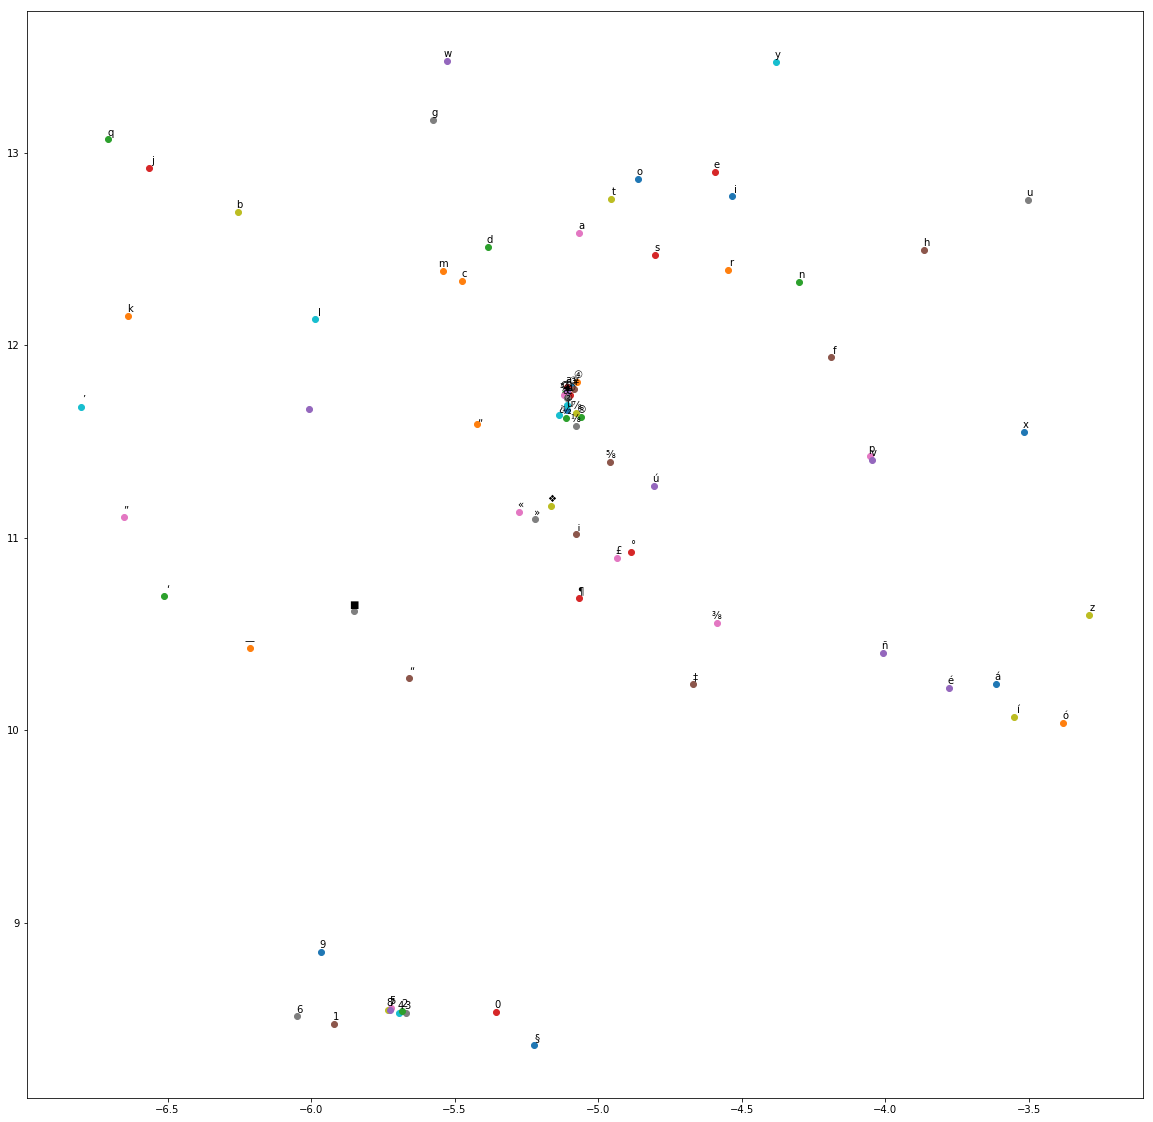

In [796]:
tsne_plot(word_model)

In [820]:
majority_no_stop = test['no_stop_words_majority'].sum()

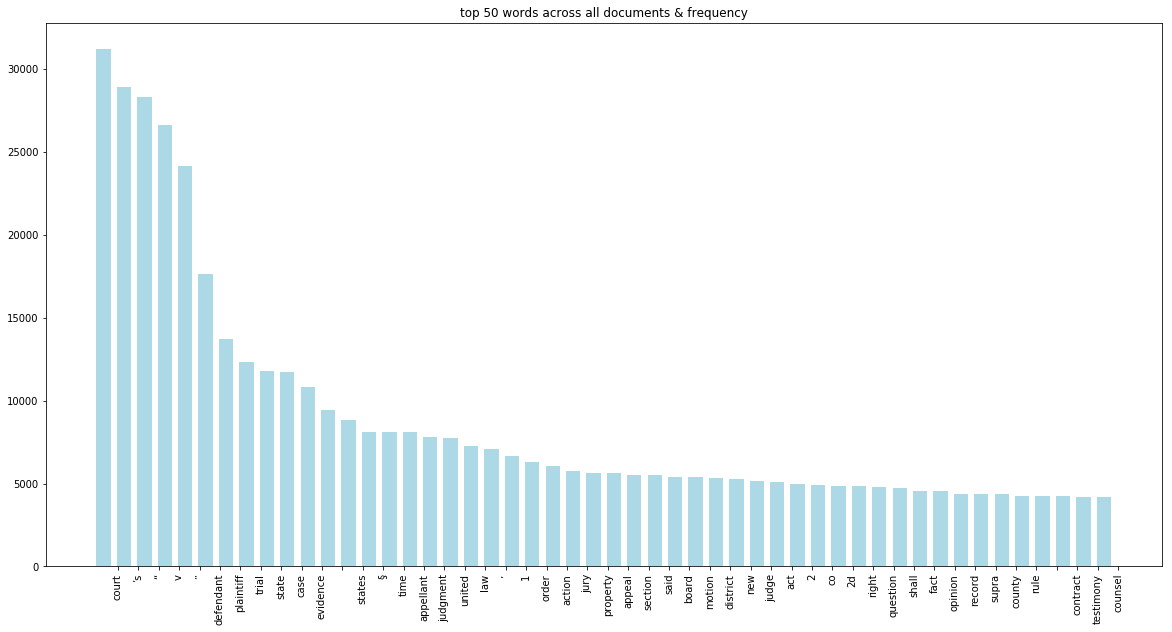

In [865]:
counter = Counter(majority_no_stop)
counter_top = OrderedDict(counter.most_common(50))
words = counter_top.keys()
word_counts = counter_top.values()

# Plot histogram using matplotlib bar().

plt.figure(figsize=(20,10))
indexes = np.arange(len(words))
width = .7

plt.bar(indexes, word_counts, width, color = 'lightblue')
plt.xticks(indexes + width, words, rotation='vertical')
plt.title('top 50 words across all documents & frequency')
plt.show()
